In [1]:
#The MNIST dataset from LeCun/Cortes/Burges is already preloaded in the keras module and will be used here
from tensorflow.python import keras
from keras.datasets import mnist 

#It is organized as a tuple of numpy arrays and split in training and test data for both the image data (X) and the labels (y)
(X_train, y_train), (X_test, y_test) = mnist.load_data()

#Access information on dataset
help(mnist)

Using TensorFlow backend.


Help on module keras.datasets.mnist in keras.datasets:

NAME
    keras.datasets.mnist - MNIST handwritten digits dataset.

FUNCTIONS
    load_data(path='mnist.npz')
        Loads the MNIST dataset.
        
        # Arguments
            path: path where to cache the dataset locally
                (relative to ~/.keras/datasets).
        
        # Returns
            Tuple of Numpy arrays: `(x_train, y_train), (x_test, y_test)`.

DATA
    absolute_import = _Feature((2, 5, 0, 'alpha', 1), (3, 0, 0, 'alpha', 0...
    division = _Feature((2, 2, 0, 'alpha', 2), (3, 0, 0, 'alpha', 0), 8192...
    print_function = _Feature((2, 6, 0, 'alpha', 2), (3, 0, 0, 'alpha', 0)...

FILE
    /anaconda3/lib/python3.6/site-packages/keras/datasets/mnist.py




In [2]:
import numpy as np
from skimage import img_as_float
from scipy import stats

#Inspect shape of arrays
print(X_train.shape)#60'000 samples of 28*28 pixel images of digits 0-9
print(y_train.shape)#corresponding labels

print(X_test.shape)#10'000 samples
print(y_test.shape)

#Number of labels (=10, from 0 to 9)
print(len(np.unique(y_train)))

#Flatten 3 dimensional arrays for use in analysis; 784 columns, one for each pixel (28*28)
X_train_data=X_train.reshape((60000,784))
X_test_data=X_test.reshape((10000,784))

print(X_train_data.shape)
print(X_test_data.shape)

#Transform data type to 'float64' which rescales data to range from 0 to 1 using skimage package (see http://scikit-image.org/docs/dev/user_guide/data_types.html)
#Necessary for SVM classification due to high dimensionality of dataset and wide range of original data type ('uint8':0-255) 
X_train_data=img_as_float(X_train_data) 
X_test_data=img_as_float(X_test_data)

print(X_train_data.dtype)
print(X_test_data.dtype)

#Inspect summary statistics on transformed data set (not done here, because it produces long output)
#stats.describe(X_train_data)
#Can verify that range of values is indeed from 0 to 1 now

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)
10
(60000, 784)
(10000, 784)
float64
float64


In [3]:
#Apply Support Vector Machines (SVM) as a more sophisticated classification approach

#Import SVM model
from sklearn import svm

#Using Grid search to find best parameters for SVM

#Import GridSearchCV
from sklearn.model_selection import GridSearchCV

#Set the parameter candidates, taken from tutorial but could also be refined by further rounds of grid search e.g. by looking more precisley for best-performing value of C
parameter_candidates = [
  {'C': [1, 10, 100, 1000], 'kernel': ['linear']},
  {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001], 'kernel': ['rbf']},
]

#Create a classifier with the parameter candidates
clf = GridSearchCV(estimator=svm.SVC(), param_grid=parameter_candidates, n_jobs=-1)

#Train the classifier on training data; I limited the sample due to runtime 
clf.fit(X_train_data[:7500], y_train[:7500])

#Print out the results 
print('Best score for training data:', clf.best_score_)
print('Best `C`:',clf.best_estimator_.C)
print('Best kernel:',clf.best_estimator_.kernel)
print('Best `gamma`:',clf.best_estimator_.gamma)

/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


Best score for training data: 0.9309333333333333
Best `C`: 100
Best kernel: rbf
Best `gamma`: 0.001


In [4]:
#Create the SVC model with the identified parameters from the grid search (the tutorial used the unoptimized model)
svc_model = svm.SVC(gamma=0.001, C=100, kernel='rbf')

#Fit the data to the SVC model
svc_model.fit(X_train_data, y_train)

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [5]:
#Apply the classifier to the test data, and view the accuracy score
svc_model.score(X_test_data, y_test)

#0.973 is a very good accuracy score on the test data

0.973

In [6]:
#Predict the label(digit) on testing data
print(svc_model.predict(X_test_data[:20]))

#Print `y_test` to check the results
print(y_test[:20])

#There is only one false prediction

[7 2 1 0 4 1 4 9 6 9 0 6 9 0 1 5 9 7 3 4]
[7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4]


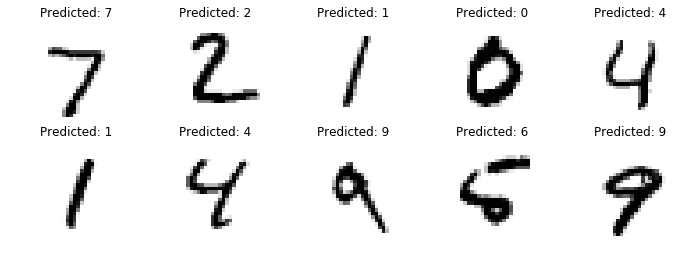

In [7]:
#Plot predictions

#Import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

#Assign the predicted values to `predicted`
predicted = svc_model.predict(X_test_data)

#Zip together the images data set (X_test) and `predicted` values in `images_and_predictions`
images_and_predictions = list(zip(X_test, predicted))

#Figure size in inches
fig = plt.figure(figsize=(12, 4))

#For the first 10 elements in `images_and_predictions`
for index, (image, prediction) in enumerate(images_and_predictions[:10]):
    # Initialize subplots in a grid of 2 by 5 at positions i+1
    ax = fig.add_subplot(2, 5, index + 1)
    # Don't show axes
    plt.axis('off')
    # Display images in all subplots in the grid
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    # Add a title to the plot
    plt.title('Predicted: ' + str(prediction))

# Show the plot
plt.show()

In [8]:
#Metrics

#Import `metrics`
from sklearn import metrics

#Print the classification report of `y_test` and `predicted`
print(metrics.classification_report(y_test, predicted))

#Print the confusion matrix
print(metrics.confusion_matrix(y_test, predicted))

#We can see that the SVM approach delivers much better predictions than the k-means clustering method

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.96      0.97      0.97      1032
           3       0.97      0.97      0.97      1010
           4       0.97      0.98      0.97       982
           5       0.97      0.96      0.97       892
           6       0.99      0.97      0.98       958
           7       0.97      0.97      0.97      1028
           8       0.97      0.96      0.96       974
           9       0.97      0.95      0.96      1009

   micro avg       0.97      0.97      0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000

[[ 972    0    1    1    1    3    0    0    2    0]
 [   0 1128    3    0    0    1    1    1    1    0]
 [   7    1 1002    1    1    0    3    7   10    0]
 [   0    0    4  984    1    7    0    4    9    1]
 [   1    0    8    0  962   

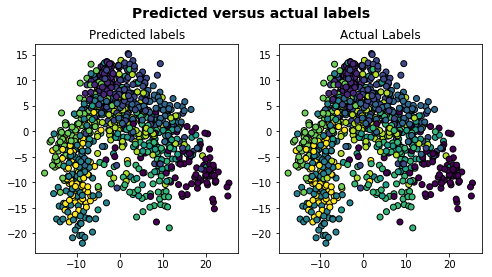

In [9]:
#Isomap plot

#Import `Isomap()`
from sklearn.manifold import Isomap

#Create an isomap and fit the test data to it
X_iso = Isomap(n_neighbors=10).fit_transform(X_test_data[:1000])


#Create a plot with subplots in a grid of 1X2
fig, ax = plt.subplots(1, 2, figsize=(8, 4))

#Adjust the layout
fig.subplots_adjust(top=0.85)

#Add scatterplots to the subplots; I limited the sample to keep tidyness in the plot
ax[0].scatter(X_iso[:, 0], X_iso[:, 1],edgecolors='black', c=predicted[:1000])
ax[0].set_title('Predicted labels')
ax[1].scatter(X_iso[:, 0], X_iso[:, 1],edgecolors='black',  c=y_test[:1000])
ax[1].set_title('Actual Labels')


#Add title
fig.suptitle('Predicted versus actual labels', fontsize=14, fontweight='bold')

#Show the plot
plt.show()

#This shows the finding from the metrics graphically; the color landscape largely matches